
아래 강의 노트는 [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 4장을 기반으로 번역 및 편집하여 페이지 구성함  
![](/Users/Jaehee/Documents/PythonDataScienceHandbook/notebooks/PythonDSH.png)

<font color ="blue"> **무단 배포를 금지 합니다.** </font>
***

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Seaborn을 사용한 시각화

Matplotlib가 유용하고 보편적으로 사용 가능 하지만, 주요 기능에 대한 아쉬움이 남아 있음

- 버전 2.0 이전에는 Matplotlib's의 기본 설정이 최선의 선택이 아니다. 1999년도의 MATLAB을 기반  

- Matplotlib의 API 는 비교적 수준이 낮다. 복잡한 통계 시각화를 할 수 있지만 종종 수많은 상용구 코드가 필요
- Matplotlib 는 Pandas보다 10년 이상 앞서 개발됐기때문에 Pandas의 ``DataFrame``과 함께 사용할 수 있게 설계되어 있지 않다.  Pandas의 ``DataFrame``데이터를 시각화 하려면 ``Series``를 추출하고 적절한 형태로 연결해야 하는 경우가 많다. 풀롯에 DataFrame 레이블을 똑똑하게 사용할 수 있는 플로팅 라이브러리를 가지는 것이 더 낫다.

이러한 문제를 해결하기 위한 해담이 바로 [Seaborn](http://seaborn.pydata.org/). Seaborn은 적절한 플롯 스타일과 색상 기본값을 제공 하고 일반적인 통계 플롯 유형을 위한 간단한 고차원 함수를 정의하여 Pandas ``DataFrame``이 제공하는 기능과 통합하는 API를 matplotlib를 위에 제공한다.

다양한 시각화에 대한 자료는 아래 링크를 통해서 더 많이 얻을 수 있음

https://seaborn.pydata.org/api.html

## Seaborn vs Matplotlib

Matplotlib의 전형적인 플롯 형식과 색상을 사용해 간단한 무직위 행보 플롯을 만들어보자.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

무작위 데이터 만들기

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

간단한 플롯:

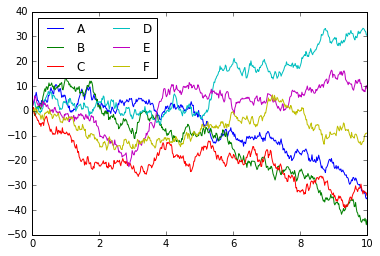

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Seaborn으로 작업하는 방법을 살펴보면,Seaborn은  고유의 고차원 플로팅 루틴을 많이 가지고 있지만 Matplotlib 기본 매개변수를 덮어쓰는 것도 가능하기 때문에 간단한  Matplotlib 스크립트를 사용해 훨씬 우수한 결과물 만들기 가능.  
Seaborn's 은 ``set()``메서드를 이용해서 스타일 설정.  
Seaborn ``sns``로 임포트 한다.

In [7]:
import seaborn as sns
sns.set()

아래 두줄은 동일하게 사용 

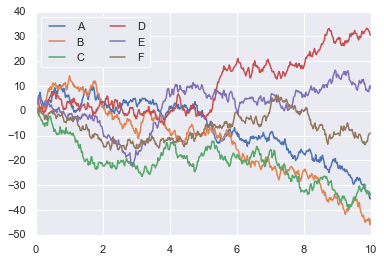

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

보기에 훨씬 더 좋음

## Seaborn Plots 탐색

Seaborn의 주요 목적은 통계 데이터 탐색과 몇가지 통계 모델 작업에 유용한 다양한 플롯 유형을 생성 할 수 있도록 고차원 명령어를 제공 하는 것이다.

Seaborn에서 사용 할 수 데이터세트와 프롯 유형을 몇가지 살펴보자

### 히스토 그램, KDE,  밀도

대체로 통계 데이터 시각화에서 하고자 하는 바는 히스토그램과 변수 결합 분포를 그리는 것이다.

히스토 그램의 평태

<AxesSubplot:ylabel='Count'>

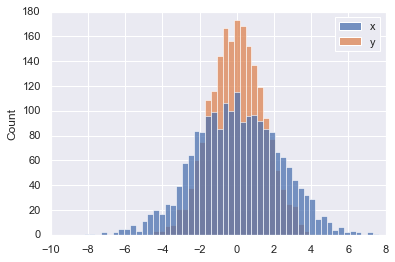

In [8]:
randdata = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
randdata = pd.DataFrame(randdata, columns=['x', 'y'])

sns.histplot(randdata)

히스토그램 대신  ``sns.kdeplot``으로 커널 밀도 추정을 사용해 분포의 평활 추정을 얻을 수 있음:

<AxesSubplot:ylabel='Density'>

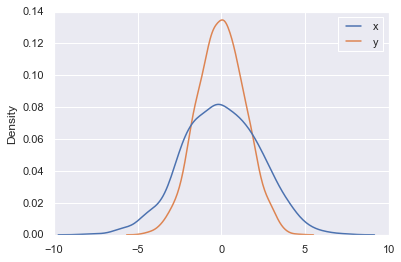

In [9]:
sns.kdeplot(data=randdata)

히스토그램과 KDE는``distplot``에서 kde옵션을 추가 하여 결합 가능:

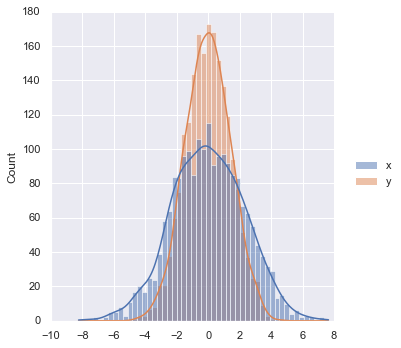

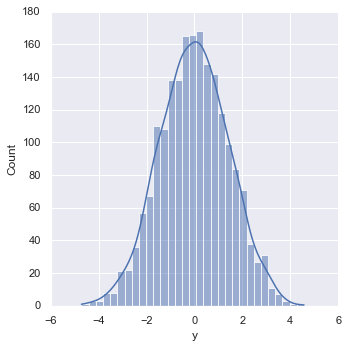

In [11]:
sns.displot(randdata, kde=True)
sns.displot(randdata['y'], kde=True)

``jointplot``를 사용하면 결합 분포와 주변 분포를 함께 볼 수 있다 

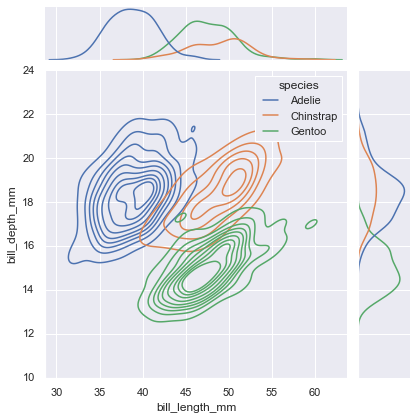

In [12]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",hue="species", kind="kde")

``sns.jointplot``은 다른 매개변수를 사용하여 다양 하게 표한 가능.
For this plot, we'll set the style to a white background:

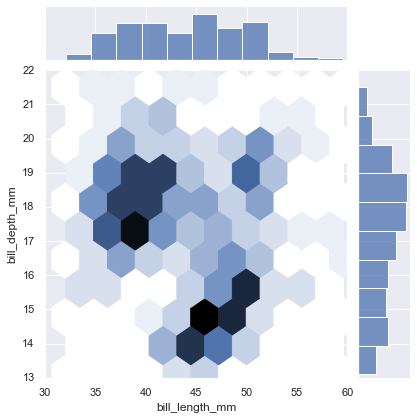

In [13]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",kind="hex")
#  kind="kde"
#kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

### 페어 플롯

큰 차원의 데이터세트에 결합 플롯을 일반화 할때는 결국 pair plot을 사용한다. 이 방식은  다차원의 데이터에서 모든 쌍의 값으 서로 플로팅 하고자 하는 경우 상관관계를 탐색하기에 매우 유용 

붓꽃 종의 꽃잎과 꽃받침 측정치를 나열한 유명한 붓꽃 데이터 세트를 이용

In [14]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


표본 사이의 다차원 관계를 시각화 하는 것은 ``sns.pairplot`` 으로 쉽게 가능:

c:\users\jaehee.desktop-bnkh9qb\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


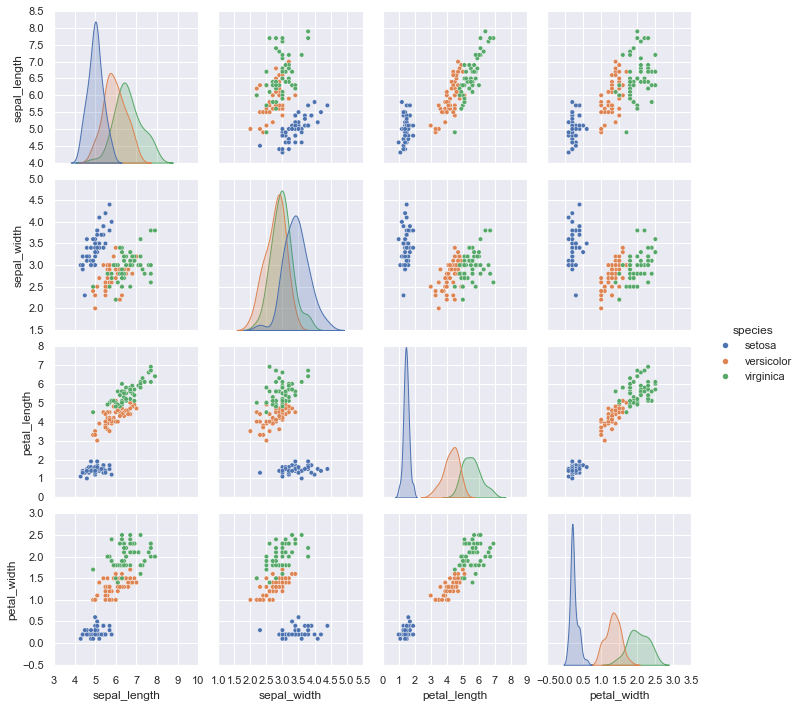

In [15]:
sns.pairplot(iris, hue='species', size=2.5);

### 다면 히스토그램

때때로 데이터를 보는 가장 좋은 방법은 부분 집합의 히스토그램을 보는 것이다. Seaborn의 ``FacetGrid``이 부분 히스토 그램을 매우 쉽게 볼 수 있게 해준다.
다양한 지표로 식당 직원이 받는 팁을 보여주는 데이터를 살표보자

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


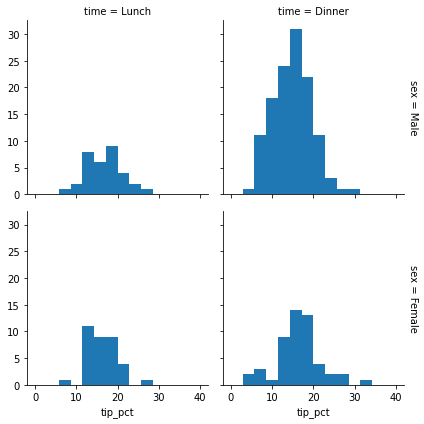

In [4]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
tips
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### 요인 플롯
요인 플롯은 여러 종류의 시각화에 매우 유용

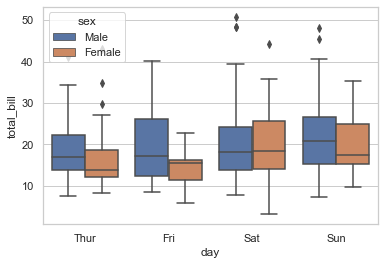

In [5]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

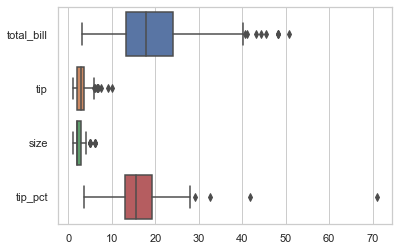

In [6]:
g = sns.boxplot(  data=tips,orient="h")

### 결합 분포
페어 플롯과 유사하게 관련된 주변 분포와 함께 다양한 데이터세트 간의 결합 분포를 보여주는데 사용:

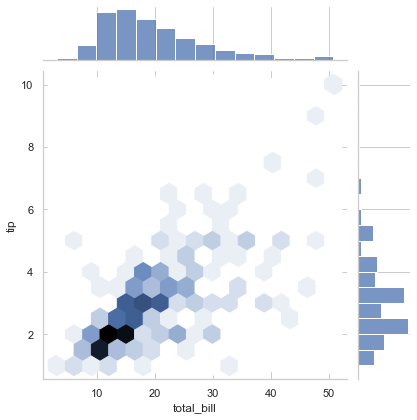

In [7]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

결합 플롯은 약간의 자동 커널 밀도추정과 회귀분석을 수행할 수 있음:

c:\users\jaehee.desktop-bnkh9qb\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


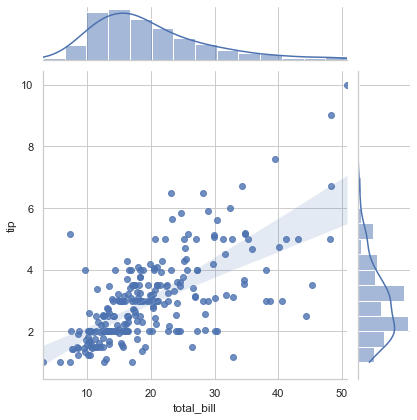

In [8]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### 막대 플롯

시계열은 ``sns.catplot``으로 플로팅 할 수 있음 

In [10]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


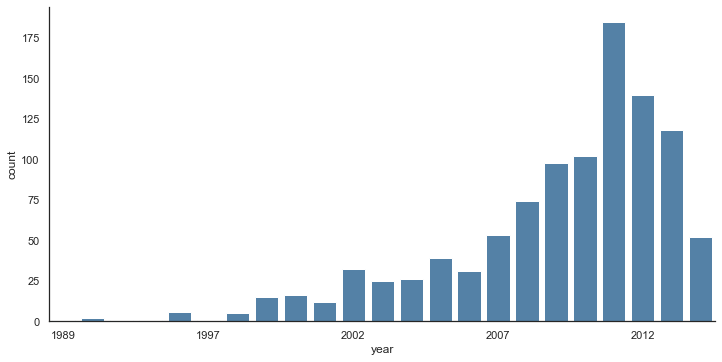

In [12]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)
    #g = sns.countplot(x="year", data=planets,color='steelblue')
    

행성을 발견한 방법을 살펴봄으로써 더 많은 사실을 알아 낼 수 있음  
아래는 연도 및 유형별로 발견된 행성 수 

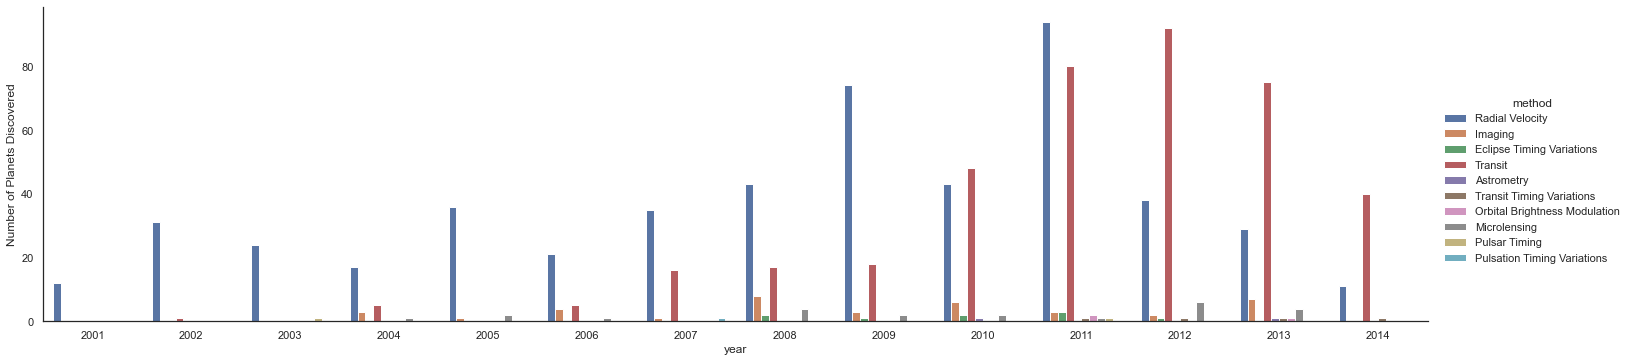

In [13]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

Seaborn을 활용한 플로팅에 더 많은 정보는  [Seaborn documentation](http://seaborn.pydata.org/),와 튜토리얼 [tutorial](http://seaborn.pydata.org/
tutorial.htm), 그리고 갤러리 [Seaborn gallery]를 참고(http://seaborn.pydata.org/examples/index.html).

## 예제: 마라톤 완주 시간 탐색

마라톤 완주 결과를 시각화하고 이해하고자 하는 예제 
웹에서 스크랩한후 개인 식별졍보를 제거한 다음 다운 로드 할 수 있도록 깃허브에 올려둠


In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [20]:
import pandas as pd
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


기본적으로 Pandas는 시간 열을 파이썬 문자열(object)로 적재한다. :

In [15]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

시간 데이터 변환기를 제공해 object 타입을 시간 데이터로 변환 :

In [37]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [23]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Seaborn플로팅을 목적으로 시간을 초로 제공 하는 열을 추가:

In [45]:
data['split_sec'] = data['split'] / np.timedelta64(1, 's')
data['final_sec'] = data['final'] / np.timedelta64(1, 's')
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


이 데이터가 어떻게 보이는지 확인하기 위해 데이터에  ``jointplot``를 플로팅:

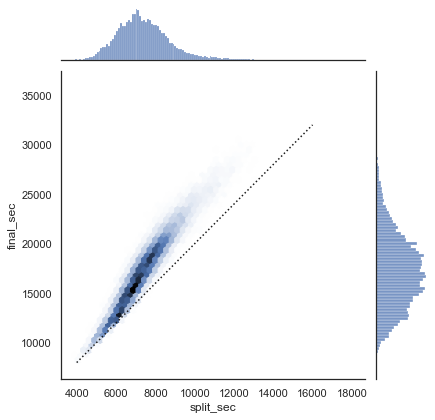

In [46]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

점선은 완벽하게 일정한 속도로 마라톤을 달리는 경우에 시간이 어디에 기록되는지 보여준다.예상했겠지만, 이위에 놓은 분포를 보면 대부분의 사람이 마라톤 코스가 진행되면서 속도가 줄어드는 것을 알 수 있다. 경쟁적으로 달리는 사람이라면 정반대 방식을 따르는 사람들을 네거티브 스플릿으로 달린다고 하는 것을 알 수 있다.

데이터에 각 주자가 네거티브 스플릿 주자인지 또는 포지티프 스플릿 주자인지 정도를 측정하는 스플릿 정도 열을 만들어 보자.  이스플릿 차이가 0보다 작은 사람은 그 수치 만큼 네거티브 스필릿으로 달린다고 볼 수 있음. 이 스플릿 정도를 가지고 분포도를 그려보자.:

In [47]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

c:\users\jaehee.desktop-bnkh9qb\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


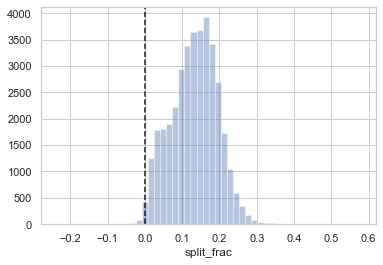

In [48]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [49]:
sum(data.split_frac < 0)

251

40,000 명의 참가자 중에서 250명만 네거티브 스플릿으로 달림.

스플릿 정도와 다른 변수들 사이에 상관관계가 있는지 알아보자. 이를 위해 이 모든 상관관계 플롯을 그려주는 pairgrid 사용:

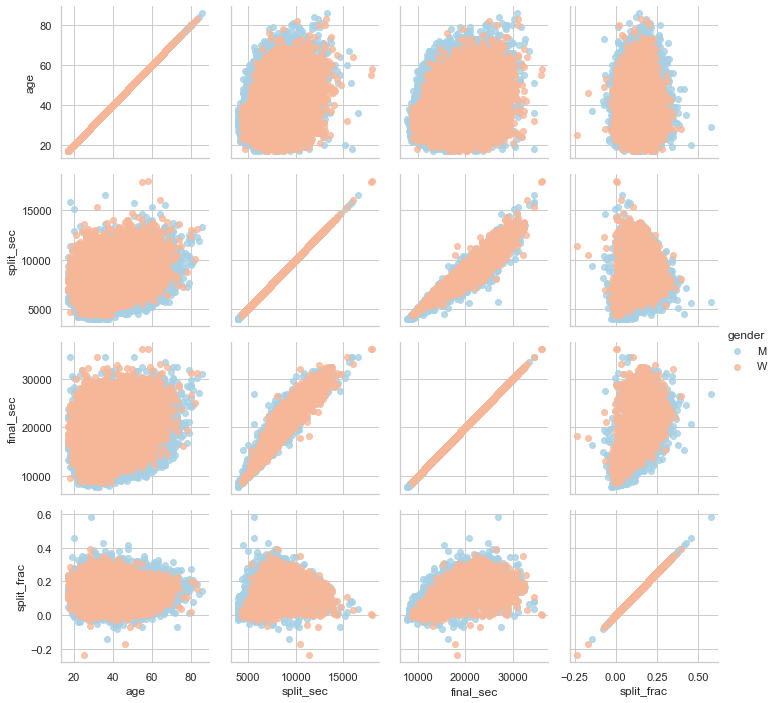

In [50]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

스플릿 정도가 나이와는 딱기 상관관계가 없지만 완주 시간과는 상관관계가 있어 보임. 

남자와 여자의 차이에 대한 두 그룹에 대한 스플릿 정도에 대한 히스토 그램을 보자

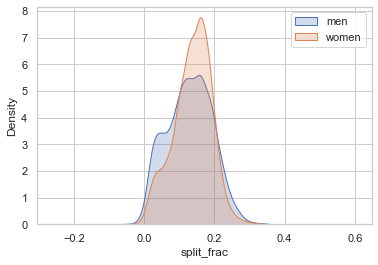

In [51]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');
plt.legend()

여기서 흥미로운 것은 이븟 스플릿에 달리는 사람은 여성보다 남성이 훨씬 많다는 점.

이 분포를 나이의 함수로 살펴보자.
분포를 비교하기 위해서 바이올린 플롯을 사용하는 것이 좋다

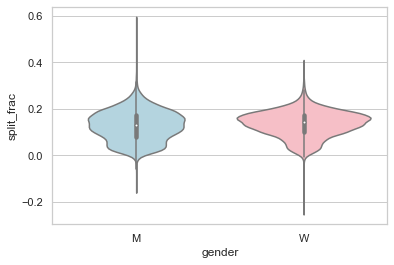

In [52]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

조금더 깊이 들어가 나이 함수를 이 바이올린 프롯으로 비교해보자. 먼저 배열에 각 사람의 나이를 10살 단위로 지정하는 새열을 만들었다.

In [53]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


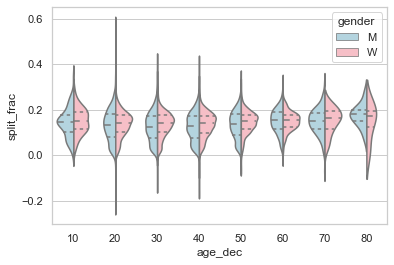

In [54]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

이 플롯을 보면 남성과 여성의 분포가 어디서 달라지는지 알 수 있다. 20대와 50대에서 남성의 스플릿 분포가 여성의 같은 연령대의 여성과 비교를 했을 때 낮은 스플릿에서 밀도가 확인이 더 높음을 볼 수 있음.

놀랍게도 80대 여성으니 스플릿 시간에서 모든 사람을 능가 하는 것처럼 보임 아마도 그 범위에 해당 하는 주자가 몇 안되어서 적은 양의 데이터로 분포를 추정했기 때문일 것으로 추정..:

In [55]:
(data.age > 80).sum()

7

네거티브 스플릿으로 달리는 남성으로 돌아가면 ``regplot``을 이용해 선형 회귀모형을 자동으로 적합 시킬 수 있다.:

c:\users\jaehee.desktop-bnkh9qb\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


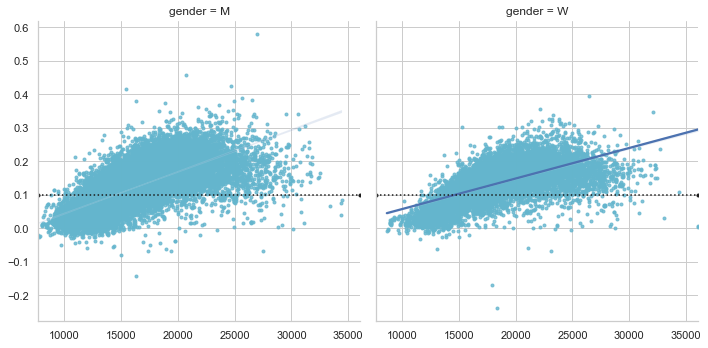

In [56]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
